Weights: [-0.19283625 -0.33063459 -0.19896915  0.31389319]
Bias: 0.02448215510923931
Test Mean Squared Error: 0.21960326675079878
R2 Value:  0.7133079163436522


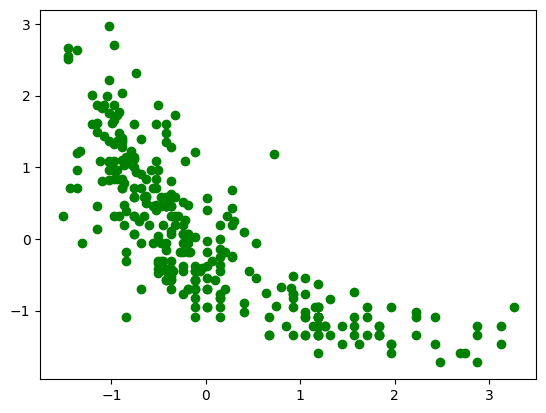

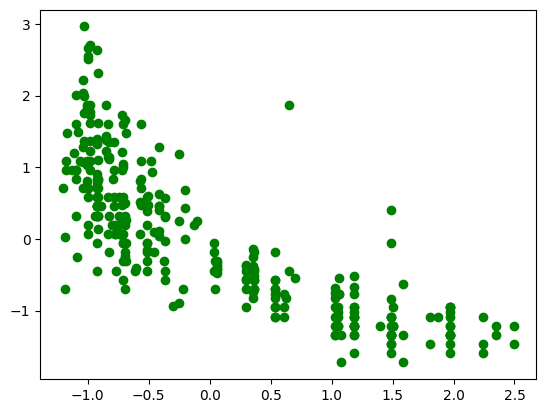

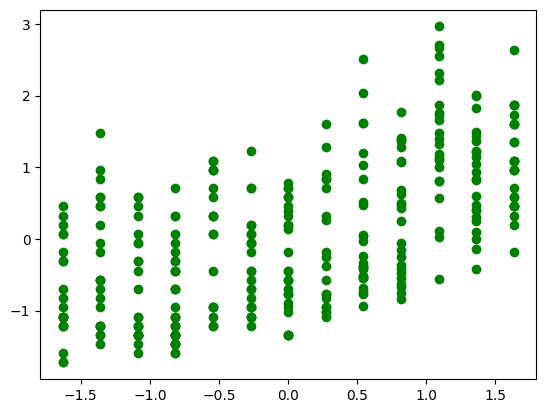

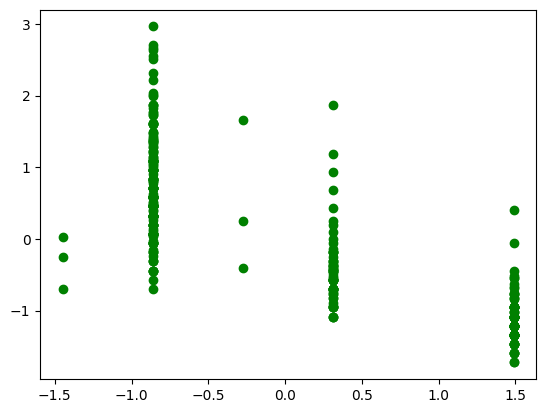

In [ ]:
import pandas as pd
import numpy as np
import random
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

cars = pd.read_csv('https://raw.githubusercontent.com/Jerpac/CS4375/main/auto-mpg.data', delim_whitespace = True)

def preprocess( carsdf )     :#preprocess the cars dataframe
  carsdf.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

  carsdf = carsdf.dropna()
  carsdf = carsdf.drop_duplicates()
  carsdf = carsdf.drop(columns = ['car_name', 'origin', 'weight', 'acceleration'])
  carsdf = carsdf.drop(carsdf[carsdf['horsepower'] == '?'].index)

  carsdf["cylinders"] = pd.to_numeric(carsdf["cylinders"], downcast="integer")
  carsdf["displacement"] = pd.to_numeric(carsdf["displacement"], downcast="float")
  carsdf["horsepower"] = pd.to_numeric(carsdf["horsepower"], downcast="float")
  carsdf["model_year"] = pd.to_numeric(carsdf["model_year"], downcast="integer")

  carsdf = carsdf.reset_index(drop=True)
  return carsdf

cars = preprocess(cars)

# normalising our variables ------------

X=cars[['cylinders', 'displacement', 'horsepower', 'model_year']]
Y = cars['mpg']
Y = np.array((Y - Y.mean())/Y.std())                        #<-----Normalizing the data
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(), axis=0)  #

# Split dataset, with 80% train and 20% test
X_train_vars, X_test_vars, Y_train_var, Y_test_var = train_test_split(X, Y, test_size=0.2, random_state=100)

# Makes the Linear Regression
model = LinearRegression()

# Train the model on training data
model.fit(X_train_vars, Y_train_var)

# Creates predictions on the test data
Y_pred_var = model.predict(X_test_vars)

# Calculate MSE on test data
mse_test = mean_squared_error(Y_test_var, Y_pred_var)

#Calculate the R^2 value
regressor = LinearRegression()
regressor.fit(X_train_vars, Y_train_var)
LinearRegression()
Y_pred = regressor.predict(X_test_vars)
r2 = r2_score(Y_test_var, Y_pred)

# Prints results
print("Weights:", model.coef_)
print("Bias:", model.intercept_)
print("Test MSE:", mse_test)
print("R2 Value: ", r2)

# Log the results into file
with open("linear_regression_data.txt", "w") as log_file:
    log_file.write("Weights: ")
    log_file.write(str(model.coef_) + "\n")
    log_file.write("Bias: ")
    log_file.write(str(model.intercept_) + "\n")
    log_file.write("MSE: ")
    log_file.write(str(mse_test) + "\n")
    log_file.write("R2: ")
    log_file.write(str(r2) + '\n')

plt.scatter(X_train_vars['horsepower'], Y_train_var,color='g')
plt.show()

plt.scatter(X_train_vars['displacement'], Y_train_var,color='g')
plt.show()

plt.scatter(X_train_vars['model_year'], Y_train_var,color='g')
plt.show()

plt.scatter(X_train_vars['cylinders'], Y_train_var,color='g')
plt.show()


# x-axis is horsepower, y-axis is miles per galon (mpg)